# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint

In [2]:
# Your code here! :)
df = pd.read_csv("GermanCredit.csv")

In [3]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [4]:
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [7]:
df['Class'].head()

0    Good
1     Bad
2    Good
3    Good
4     Bad
Name: Class, dtype: object

In [4]:
df["Class"] = df["Class"].astype('category')

In [5]:
df['Class'] = df["Class"].cat.codes

### After you've built the best model you can, now it's time to visualize it!

In [17]:
df["Class"].head()
#0:Good (deserves loan)
#1:Bad (doesn't deserve loan)

0    1
1    0
2    1
3    1
4    0
Name: Class, dtype: int8

In [6]:
clf = DecisionTreeClassifier()


Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

In [7]:
df["Purpose"] = df[['Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other']].values.tolist()#astype('category')

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [8]:
#Question: Can I access all columns with similar names using regular expressions rather than copying and pasting like I did?
#I tried df['Credit*'], but that didn't work.
df["Credit"] = df[['CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical']].values.tolist()
df["CheckingAccount"] = df[['CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none']].values.tolist()
df["SavingsAccount"] = df[['SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown']].values.tolist()
df["Employment"] = df[['EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7',
       'EmploymentDuration.gt.7', 'EmploymentDuration.Unemployed']].values.tolist()
df["OtherDebtors"] = df[['OtherDebtorsGuarantors.None',
       'OtherDebtorsGuarantors.CoApplicant',
       'OtherDebtorsGuarantors.Guarantor']].values.tolist()
df["PropertyType"] = df[['Property.RealEstate',
       'Property.Insurance', 'Property.CarOther', 'Property.Unknown']].values.tolist()
df["OtherInstallmentPlans"] = df[['OtherInstallmentPlans.Bank', 'OtherInstallmentPlans.Stores',
       'OtherInstallmentPlans.None']].values.tolist()
df["Housing"] = df[['Housing.Rent', 'Housing.Own',
       'Housing.ForFree']].values.tolist()
df["Job"] = df[['Job.UnemployedUnskilled', 'Job.UnskilledResident',
       'Job.SkilledEmployee', 'Job.Management.SelfEmp.HighlyQualified']].values.tolist()
df["Sex_MaritalStatus"] = df[['Personal.Male.Divorced.Seperated', 'Personal.Female.NotSingle',
       'Personal.Male.Single', 'Personal.Male.Married.Widowed',
       'Personal.Female.Single']].values.tolist()
#still have to deal with sex and marital status. Also have to convert lists to categoricals

In [9]:
def convertListColumnToCategorical(l):
    i=0
    while i < len(l):
        if l[i] == 1:#then this is the category of this row
            return i
        i += 1
        
    return -1#no conditions were met, return dummy value

#takes result of convertListColumnToCategorical for the Sex_MaritalStatus and converts to sex and marital status
def sex(v):
    if v == 1 or v == 4:
        return 0#female
    else:
        return 1#male
def martialStatus(v):
    if v == 2 or v == 4:
        return 0#single
    elif v == 0:
        return 1#divorced/separated
    elif v == 3:
        return 2#married/widowed
    else:
        return 3#in a relationship

In [52]:
#test function 
assert convertListColumnToCategorical([0,0,0,1,0,0]) == 3
assert convertListColumnToCategorical([1,0,0,0]) == 0
assert convertListColumnToCategorical([0,0,1]) == 2
assert convertListColumnToCategorical([0,0,0]) == -1


In [53]:
df['Credit'].apply(convertListColumnToCategorical).head()
#This approach will convert from list to categorical.

0    4
1    2
2    4
3    2
4    3
Name: Credit, dtype: int64

In [10]:
df["Credit"] = df["Credit"].apply(convertListColumnToCategorical)
df["CheckingAccount"] = df["CheckingAccount"].apply(convertListColumnToCategorical)
df["SavingsAccount"] = df["SavingsAccount"].apply(convertListColumnToCategorical)
df["Employment"] = df["Employment"].apply(convertListColumnToCategorical)
df["OtherDebtors"] = df["OtherDebtors"].apply(convertListColumnToCategorical)
df["PropertyType"] = df["PropertyType"].apply(convertListColumnToCategorical)
df["OtherInstallmentPlans"] = df["OtherInstallmentPlans"].apply(convertListColumnToCategorical)
df["Housing"] = df["Housing"].apply(convertListColumnToCategorical)
df["Job"] = df["Job"].apply(convertListColumnToCategorical)
df["Sex_MaritalStatus"] = df["Sex_MaritalStatus"].apply(convertListColumnToCategorical)
df["Sex"] = df["Sex_MaritalStatus"].apply(sex)
df["MaritalStatus"] = df["Sex_MaritalStatus"].apply(martialStatus)

In [12]:
df[["Duration", "Amount", "InstallmentRatePercentage", "ResidenceDuration",
       "Age", "NumberExistingCredits", "NumberPeopleMaintenance", "Telephone",
       "ForeignWorker", "Credit","CheckingAccount","SavingsAccount","Employment",
    "OtherDebtors","PropertyType","OtherInstallmentPlans","Housing","Job","Sex","MaritalStatus","Class"]].head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Credit,...,SavingsAccount,Employment,OtherDebtors,PropertyType,OtherInstallmentPlans,Housing,Job,Sex,MaritalStatus,Class
0,6,1169,4,4,67,2,1,0,1,4,...,4,3,0,0,2,1,2,1,0,1
1,48,5951,2,2,22,1,1,1,1,2,...,0,1,0,0,2,1,2,0,3,0
2,12,2096,2,3,49,1,2,1,1,4,...,0,2,0,0,2,1,1,1,0,1
3,42,7882,2,4,45,1,2,1,1,2,...,0,2,2,1,2,2,2,1,0,1
4,24,4870,3,4,53,2,2,1,1,3,...,0,1,0,3,2,2,2,1,0,0


In [11]:
df2 = df[["Duration", "Amount", "InstallmentRatePercentage", "ResidenceDuration",
       "Age", "NumberExistingCredits", "NumberPeopleMaintenance", "Telephone",
       "ForeignWorker", "Credit","CheckingAccount","SavingsAccount","Employment",
    "OtherDebtors","PropertyType","OtherInstallmentPlans","Housing","Job","Sex","MaritalStatus","Class"]]
X = df[["Duration", "Amount", "InstallmentRatePercentage", "ResidenceDuration",
       "Age", "NumberExistingCredits", "NumberPeopleMaintenance", "Telephone",
       "ForeignWorker", "Credit","CheckingAccount","SavingsAccount","Employment",
    "OtherDebtors","PropertyType","OtherInstallmentPlans","Housing","Job","Sex","MaritalStatus"]]
y = df["Class"]
#in this representation of the data, I have cut the number of features by 2/3. So that's pretty good. Basically I 
#converted the data of many columns and coverted them to categoricals.

In [ ]:
#Now that I have cleaned the data, I can start model creation

#from the logistic regression project
#KFold cross-validation tries new training and test sets to attempt to get overall better accuracy.
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average




In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)


In [60]:
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.6485714285714286


In [25]:
#Let's try building a few different models
acc = np.zeros(shape=(100,100))
c = 0
for i in np.arange(0.1,0.9,0.008):#training set size
    for j in range(1,101):#random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=j)
        clf.fit(X_train, y_train)
        acc[c][j-1] = accuracy_score(clf.predict(X_test), y_test)
    c += 1
print(acc)

[[0.72       0.66       0.68       ... 0.75       0.73       0.71      ]
 [0.66055046 0.65137615 0.66972477 ... 0.72477064 0.64220183 0.67889908]
 [0.70940171 0.64102564 0.68376068 ... 0.69230769 0.60683761 0.67521368]
 ...
 [0.65678449 0.65564424 0.64082098 ... 0.63854048 0.65108324 0.64424173]
 [0.64858757 0.63615819 0.59774011 ... 0.64180791 0.63841808 0.62372881]
 [0.67077268 0.66965286 0.63493841 ... 0.64277716 0.64389698 0.67525196]]


In [27]:
for i in range(0, 100):
    print(np.mean(acc[i]))
#I am surprised that adding more training data didn't change the accuracy of the model built. That honestly kind of bothers me.

0.6798000000000002
0.6784403669724771
0.6753846153846154
0.67936
0.6845112781954888
0.6797872340425535
0.6831543624161074
0.6810191082802548
0.6843030303030304
0.6819075144508671
0.683646408839779
0.6850793650793651
0.6850761421319795
0.6851707317073169
0.6834272300469482
0.6814027149321267
0.6799563318777294
0.6759071729957806
0.6793877551020409
0.6796837944664031
0.6804597701149426
0.6808921933085503
0.6787725631768952
0.6819649122807018
0.6792491467576792
0.6773754152823922
0.6773139158576054
0.6747003154574132
0.6766153846153845
0.6773273273273275
0.6757478005865104
0.6750429799426934
0.67515406162465
0.6773972602739725
0.6749865951742627
0.6779790026246718
0.6754755784061695
0.6761209068010078
0.6728641975308642
0.6738740920096852
0.6740142517814728
0.6761072261072262
0.6776887871853547
0.6766292134831463
0.6763355408388521
0.6755314533622561
0.6756929637526654
0.6738574423480085
0.6742680412371135
0.67237322515213
0.6719560878243513
0.673909626719057
0.671972920696325
0.673942857

In [69]:
#I found on DataCamp a way to do a parameter search on the model:
#https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
#clf.fit(X_train, y_train)
#clf = DecisionTreeClassifier()
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(clf, param_dist, cv=5)
tree_cv.fit(X_train, y_train)
print(accuracy_score(tree_cv.predict(X_test), y_test))
#Honestly this doesn't seem to be giving any better model than before. Is there any reason why?

0.7028571428571428


/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
print(tree_cv.cv_results_['mean_test_score'])

[0.67333333 0.66666667 0.66333333 0.73333333 0.68666667 0.71
 0.72666667 0.71       0.68666667 0.71      ]


In [79]:
#print(tree_cv.cv_results_['params'][4])
print(tree_cv.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 11}


In [86]:
clfBEST = DecisionTreeClassifier(criterion='gini', max_features=9, min_samples_leaf=11, max_depth=3)
clfBEST.fit(X_train, y_train)
print(accuracy_score(clfBEST.predict(X_test), y_test))

0.7057142857142857


In [48]:
#The GridSearchCV doesn't seem to work because it doesn't accept the C values.
#grid = GridSearchCV(estimator=clf, param_grid=dict(C=[0.001, 0.1, 1, 10, 100]))#TODO still need to define the cs
#honestly I should probably use some optimizer function to optimize the fit....
#grid.fit(X_train,y_train)
#print(grid.best_score_)
#print(grid.best_estimator_.C)
#print(accuracy_score(clf.predict(X_test), y_test))

In [51]:
#For comparison, let's run a logistic regression. I mean, this is a simple binary classification problem.
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
# Fit the model on the trainng data.
logReg.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(logReg.predict(X_test), y_test))

0.7385714285714285


/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
#What, is this going to be a better model?
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
    logReg.fit(X_train, y_train)
    # Print the accuracy from the testing data.
    print(accuracy_score(logReg.predict(X_test), y_test))
#Sadly, it seems the the logistic regression seems to be doing better than the decision tree...

/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

0.7457142857142857
0.7385714285714285
0.7442857142857143
0.7285714285714285
0.7557142857142857
0.7457142857142857
0.7442857142857143
0.76
0.7714285714285715
0.7528571428571429
0.7528571428571429
0.7371428571428571
0.7314285714285714
0.7342857142857143
0.7457142857142857
0.7457142857142857
0.7342857142857143
0.76
0.7514285714285714
0.7457142857142857
0.75
0.7428571428571429
0.75
0.7357142857142858
0.74
0.7357142857142858
0.7542857142857143
0.7242857142857143
0.76
0.7585714285714286
0.7357142857142858
0.7385714285714285
0.7471428571428571
0.7485714285714286
0.75
0.73
0.7642857142857142
0.7428571428571429
0.7342857142857143
0.7485714285714286
0.74
0.7228571428571429
0.7385714285714285
0.7671428571428571


/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

0.7514285714285714
0.7357142857142858
0.74
0.7385714285714285
0.7642857142857142
0.7628571428571429
0.7642857142857142
0.7485714285714286
0.74
0.7614285714285715
0.7414285714285714
0.7328571428571429
0.73
0.7642857142857142
0.76
0.7457142857142857
0.7342857142857143
0.7514285714285714
0.7471428571428571
0.7542857142857143
0.7442857142857143
0.7585714285714286
0.7628571428571429
0.7628571428571429
0.7557142857142857
0.76
0.7685714285714286
0.7342857142857143
0.74
0.7414285714285714
0.7571428571428571
0.7571428571428571
0.7457142857142857
0.7414285714285714
0.7242857142857143
0.7585714285714286
0.7442857142857143
0.7428571428571429
0.7328571428571429
0.7542857142857143
0.7214285714285714
0.7457142857142857
0.7628571428571429
0.7628571428571429
0.77
0.7614285714285715
0.7414285714285714
0.73
0.7314285714285714
0.7471428571428571
0.7428571428571429
0.7428571428571429
0.7457142857142857
0.76
0.7442857142857143
0.7514285714285714


/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [ ]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

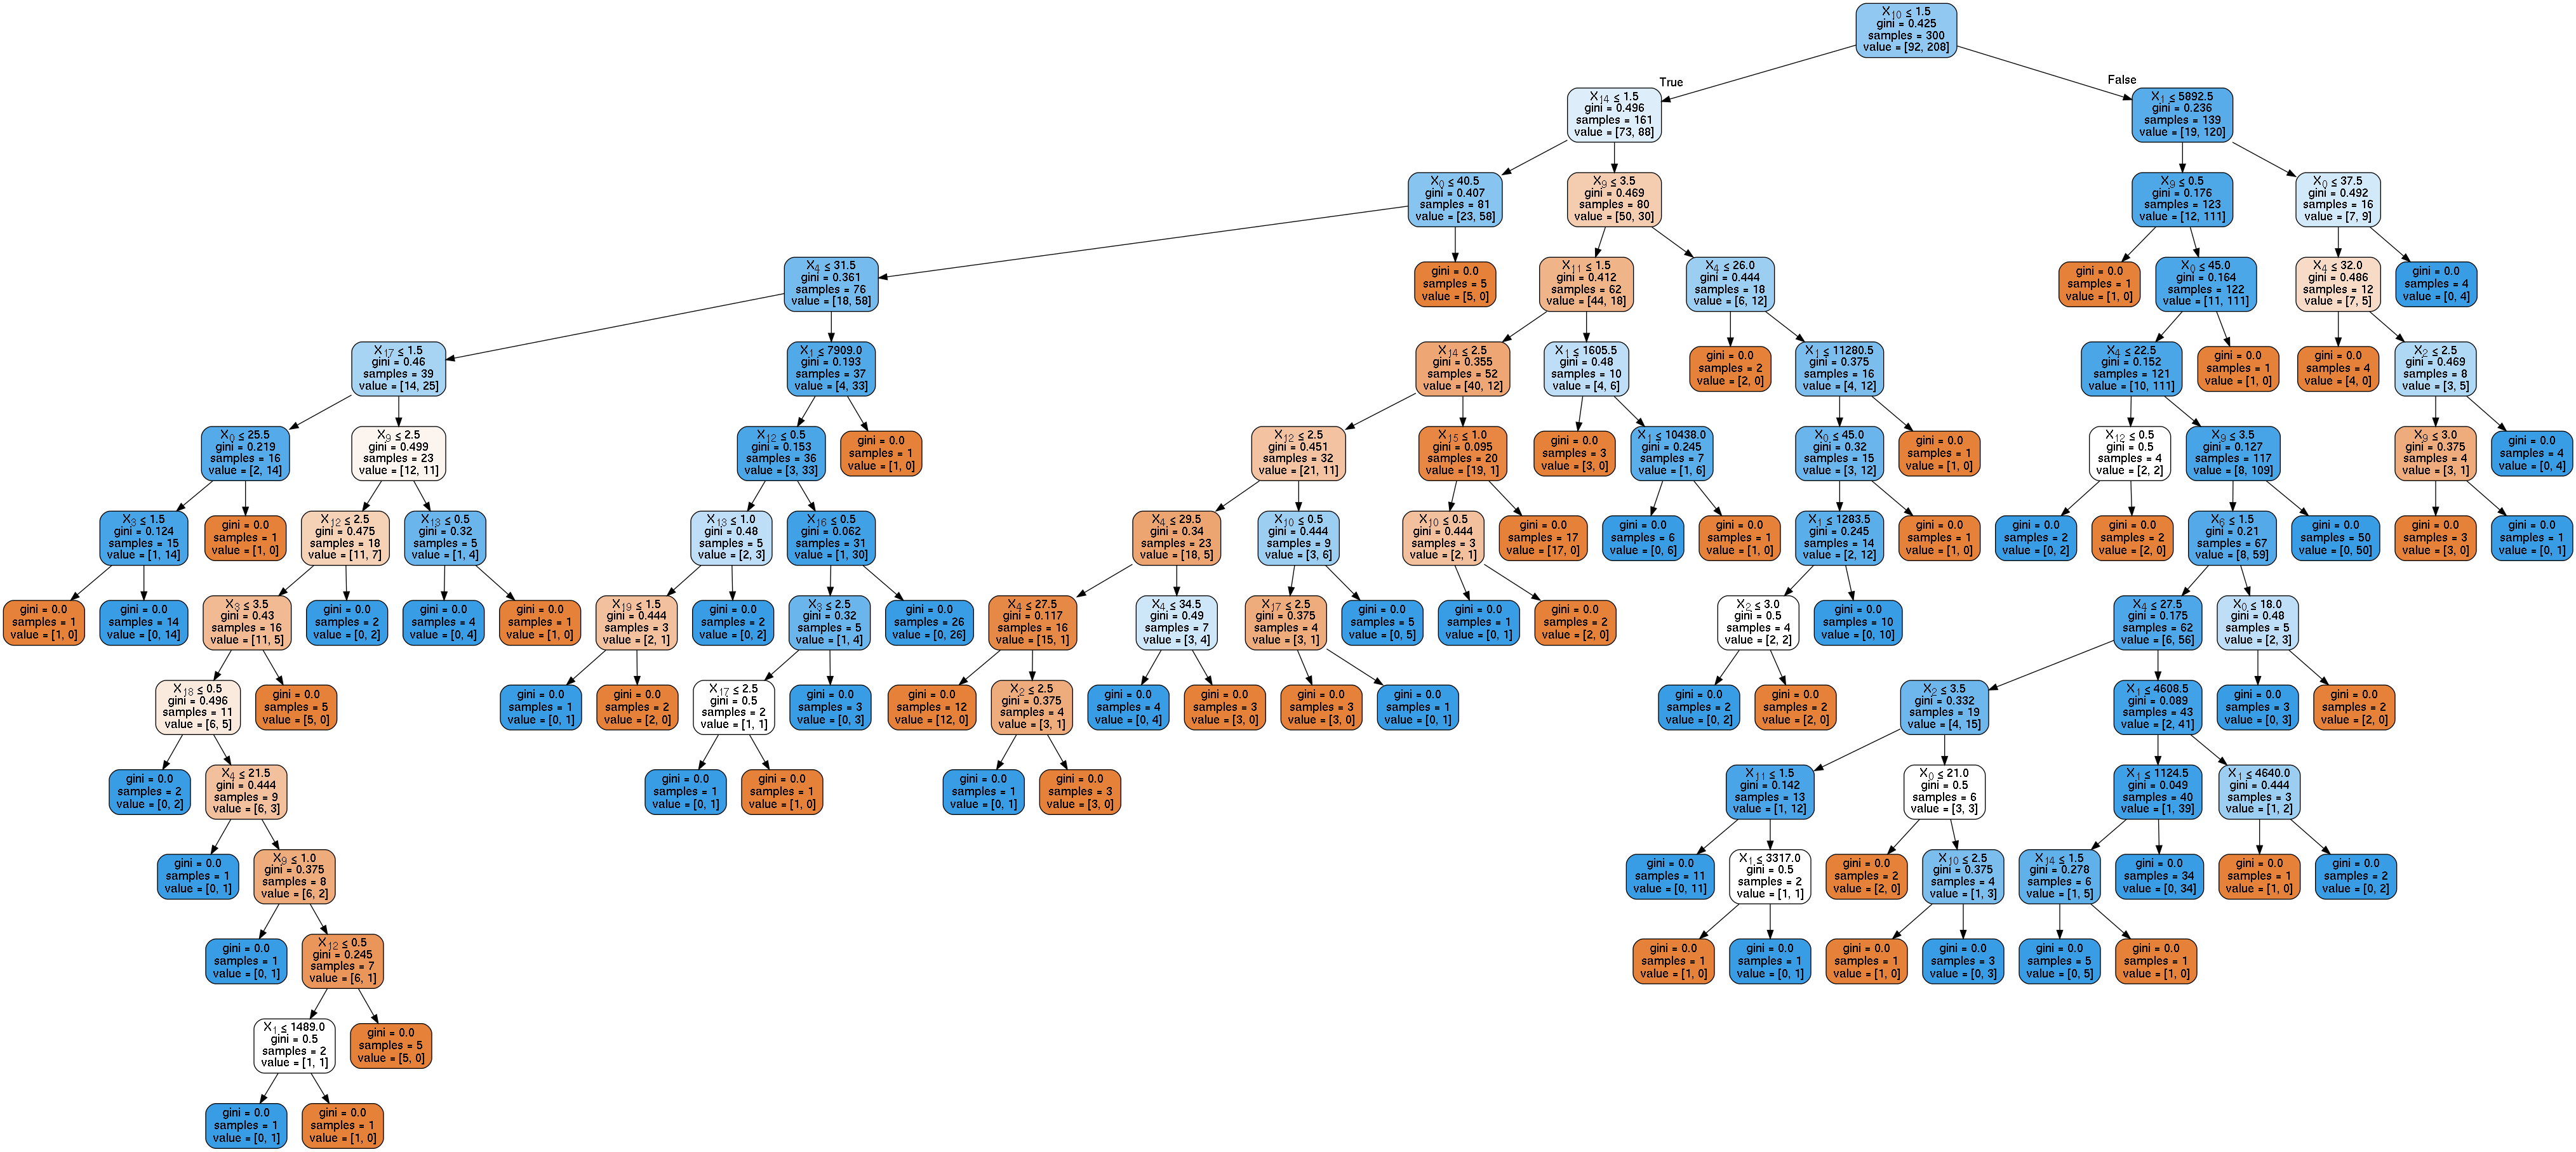

In [64]:
# Your code here! :)
#I found something that shows how to visualize a decision tree
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  #here I have clf because it wouldn't take tree_cv for some reason.
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

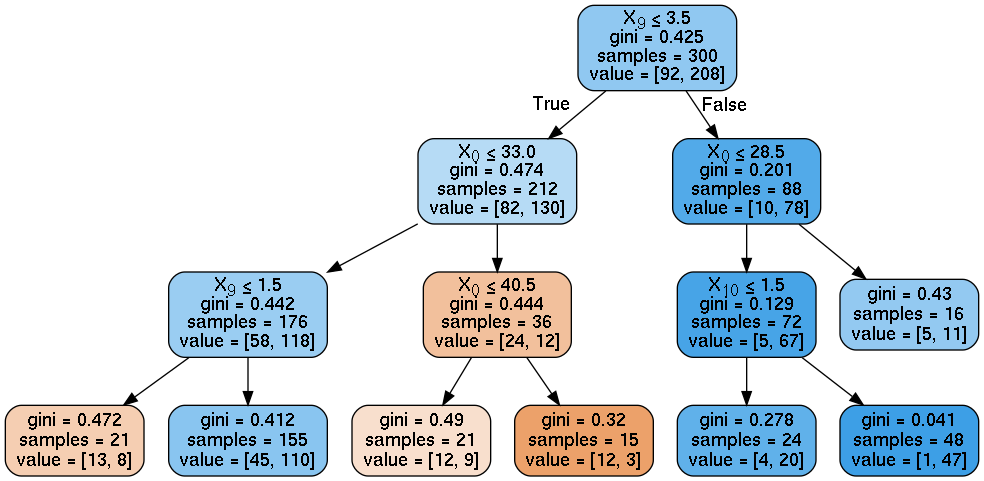

In [89]:
dot_data = StringIO()
export_graphviz(clfBEST, out_file=dot_data,  #here I have clf because it wouldn't take tree_cv for some reason.
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#I like this tree better because it is much simpler, and it performed better.
#This also shows that the features which seem to matter the most are features 0, 9, and 10, i.e. Duration, Credit, and
#CheckingAccount, respectively.
#I'm not yet sure what the colors mean though so I can't interpret the result...

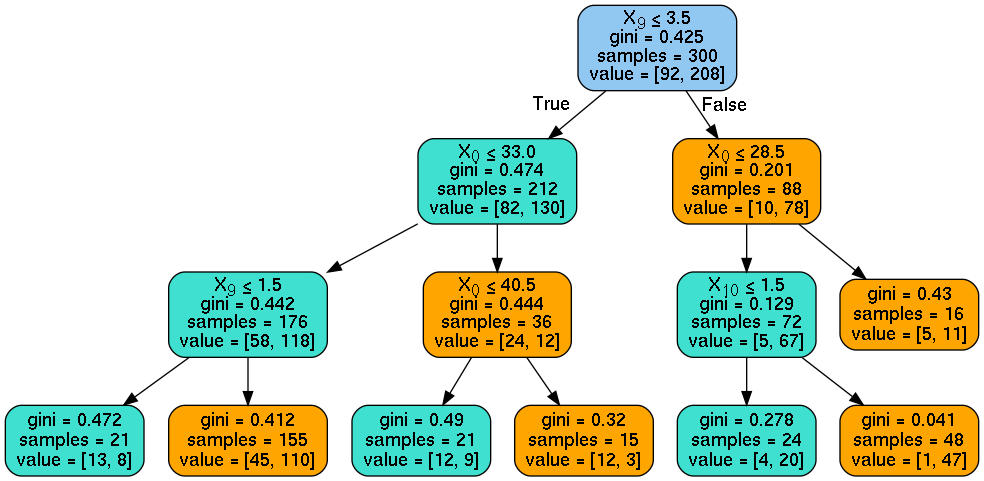

In [93]:
import collections
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

Image(graph.create_png())
#graph.write_png('tree.png')

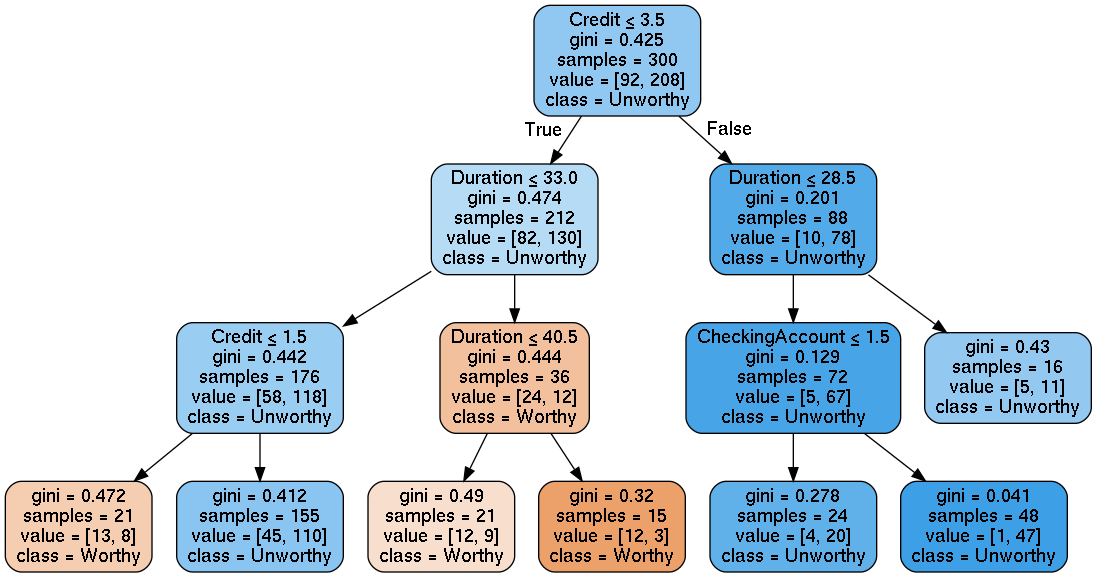

In [98]:
#Found some additional informtion to help clarify this
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
dot_data = StringIO()
export_graphviz(clfBEST, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['Worthy','Unworthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [99]:
#Let's try to interpret this.
#The root node basically makes a decision depending on whether someone has good/no credit (left) vs bad credit (right).
#If you have good/no credit, and the loan term is between 33 and 41 years, then we classify as worthy of the loan.
#If you have no credit or all credit is paid at this bank, and the loan term is less than 33 years, we classify as worthy.
#If you have credit paid duly and the term is less then 33 years, we classify as unworthy.
#There is no case which classifies you as worthy of the loan if you have bad credit.

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
# Your code here! :)
randomForest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
randomForest.fit(X_train, y_train)
print(randomForest.feature_importances_)
print(accuracy_score(randomForest.predict(X_test), y_test))
#well, that was way too easy.
#On the plus side, this way did indeed give better performance...

[0.12593152 0.12317547 0.02894074 0.02892901 0.09662044 0.02069828
 0.00632668 0.02076154 0.00231449 0.09875587 0.1618605  0.04273556
 0.0541728  0.01157537 0.06621573 0.02045348 0.0391094  0.03086491
 0.00694206 0.01361617]
0.7285714285714285


In [112]:
for i in range(2, 21):
    randomForest = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
    randomForest.fit(X_train, y_train)
    #print(randomForest.feature_importances_)
    print("max depth: " + str(i) + ", accuracy: " + str(accuracy_score(randomForest.predict(X_test), y_test)))
#well, we gain a bit of accuracy as we go deeper.
#but what is honestly sad is that we don't really gain anything past the first decision...

max depth: 2, accuracy: 0.71
max depth: 3, accuracy: 0.7228571428571429
max depth: 4, accuracy: 0.7214285714285714
max depth: 5, accuracy: 0.7285714285714285
max depth: 6, accuracy: 0.7285714285714285
max depth: 7, accuracy: 0.73
max depth: 8, accuracy: 0.7371428571428571
max depth: 9, accuracy: 0.7257142857142858
max depth: 10, accuracy: 0.7342857142857143
max depth: 11, accuracy: 0.73
max depth: 12, accuracy: 0.7357142857142858
max depth: 13, accuracy: 0.7442857142857143
max depth: 14, accuracy: 0.7457142857142857
max depth: 15, accuracy: 0.7457142857142857
max depth: 16, accuracy: 0.7471428571428571
max depth: 17, accuracy: 0.7442857142857143
max depth: 18, accuracy: 0.7442857142857143
max depth: 19, accuracy: 0.7442857142857143
max depth: 20, accuracy: 0.7442857142857143


In [115]:
i=10
while i <= 10000:
    randomForest = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    randomForest.fit(X_train, y_train)
    #print(randomForest.feature_importances_)
    print("n_estimators: " + str(i) + ", accuracy: " + str(accuracy_score(randomForest.predict(X_test), y_test)))
    i *= 10
#well, I was hoping that more estimators would help...but that doesn't seem to be the case...perhaps if we give a bit more
#depth it will help

n_estimators: 10, accuracy: 0.7157142857142857
n_estimators: 100, accuracy: 0.71
n_estimators: 1000, accuracy: 0.71
n_estimators: 10000, accuracy: 0.7114285714285714


In [116]:
i=10
while i <= 10000:
    randomForest = RandomForestClassifier(n_estimators=i, max_depth=10, random_state=0)
    randomForest.fit(X_train, y_train)
    #print(randomForest.feature_importances_)
    print("n_estimators: " + str(i) + ", accuracy: " + str(accuracy_score(randomForest.predict(X_test), y_test)))
    i *= 10
#there we go. That helps some.

n_estimators: 10, accuracy: 0.72
n_estimators: 100, accuracy: 0.7342857142857143
n_estimators: 1000, accuracy: 0.7457142857142857
n_estimators: 10000, accuracy: 0.7442857142857143


In [117]:
i=10
while i <= 10000:
    randomForest = RandomForestClassifier(n_estimators=i, max_depth=20, random_state=0)
    randomForest.fit(X_train, y_train)
    #print(randomForest.feature_importances_)
    print("n_estimators: " + str(i) + ", accuracy: " + str(accuracy_score(randomForest.predict(X_test), y_test)))
    i *= 10
#either way, it seems we can't really exceed about 75% accuracy here.

n_estimators: 10, accuracy: 0.7057142857142857
n_estimators: 100, accuracy: 0.7442857142857143
n_estimators: 1000, accuracy: 0.75
n_estimators: 10000, accuracy: 0.7471428571428571


In [118]:
# Your code here
randomForest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
randomForest.fit(X_train, y_train)
print(accuracy_score(randomForest.predict(X_test), y_test))

0.7285714285714285


Feature ranking:
1. feature 10 (0.161861)
2. feature 0 (0.125932)
3. feature 1 (0.123175)
4. feature 9 (0.098756)
5. feature 4 (0.096620)
6. feature 14 (0.066216)
7. feature 12 (0.054173)
8. feature 11 (0.042736)
9. feature 16 (0.039109)
10. feature 17 (0.030865)
11. feature 2 (0.028941)
12. feature 3 (0.028929)
13. feature 7 (0.020762)
14. feature 5 (0.020698)
15. feature 15 (0.020453)
16. feature 19 (0.013616)
17. feature 13 (0.011575)
18. feature 18 (0.006942)
19. feature 6 (0.006327)
20. feature 8 (0.002314)


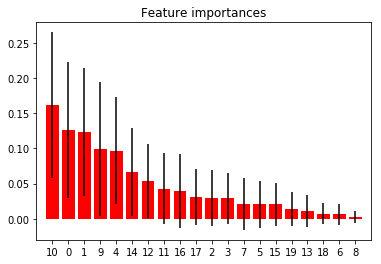

In [124]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [127]:
#Well, honestly this didn't help pick out one feature as incredibly important. Which doesn't seem to help all that much
#in simplifying the classification problem. Honestly that's probably why the accuracy isn't so nice.
#Correctly predicting loan-worthiness seems to be a bit more complicated than just the metrics we are using here.
#I mean, also, we only have 1000 data points. Probably not enough to really identify the patterns. That might be the real
#problem here.

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [129]:
# Your code here!
import pdpbox
from pdpbox import pdp

In [138]:
pdp1 = pdp.pdp_interact(randomForest, X, X.columns,['Credit','Duration'])

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

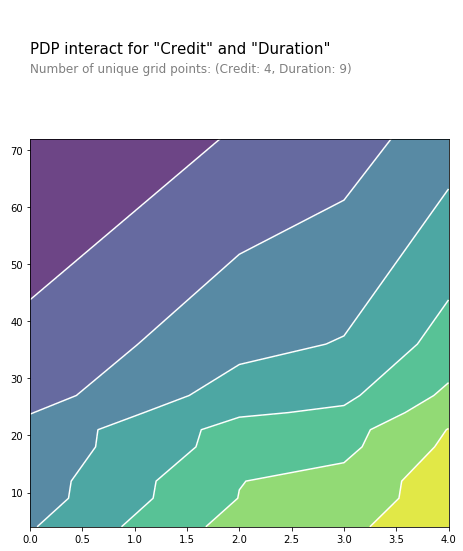

In [139]:
pdp.pdp_interact_plot(pdp1, ['Credit','Duration'])
#So...why are these giving errors? This is exactly how the documentation says to do it. And the article given
#here is actually wrong.

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

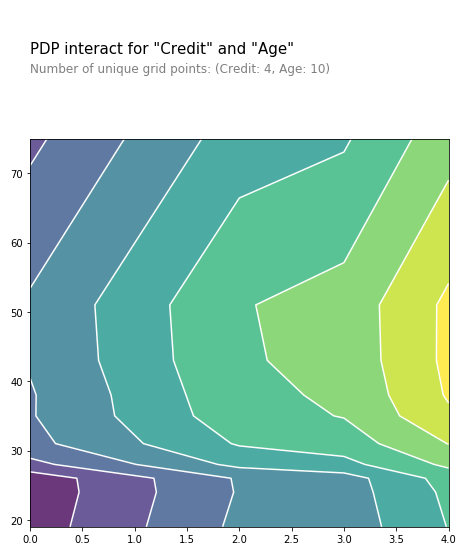

In [140]:
pdp2 = pdp.pdp_interact(randomForest, X, X.columns,['Credit','Age'])
pdp.pdp_interact_plot(pdp2, ['Credit','Age'])

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

In [142]:
import xgboost as xgb

In [143]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
#param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.681915	train-auc:0.770825
[1]	eval-auc:0.697863	train-auc:0.831287
[2]	eval-auc:0.696998	train-auc:0.862354
[3]	eval-auc:0.683474	train-auc:0.880618
[4]	eval-auc:0.688282	train-auc:0.89734
[5]	eval-auc:0.701757	train-auc:0.908994
[6]	eval-auc:0.700472	train-auc:0.926291
[7]	eval-auc:0.714123	train-auc:0.935018
[8]	eval-auc:0.716063	train-auc:0.94283
[9]	eval-auc:0.70632	train-auc:0.948343


Happy modeling! :)

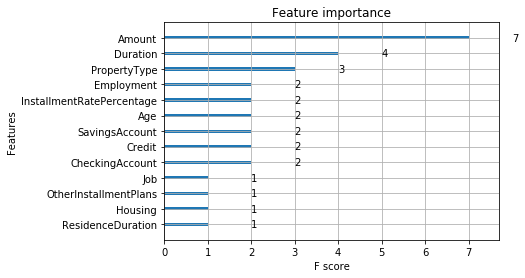

In [145]:
xgb.plot_importance(bst)

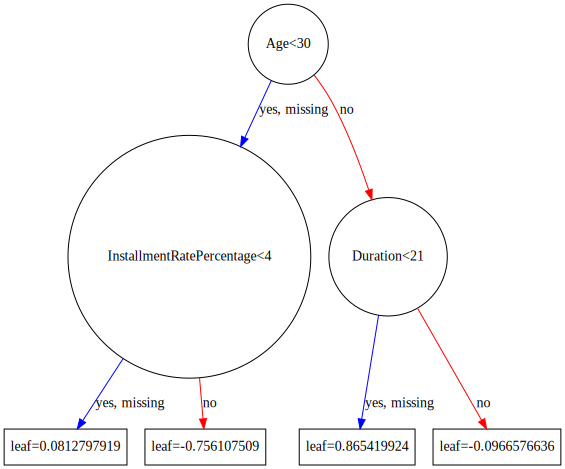

In [147]:
#xgb.plot_tree(bst, num_trees=2)
xgb.to_graphviz(bst, num_trees=2)

[0]	eval-auc:0.68601	train-auc:0.813023
[1]	eval-auc:0.702001	train-auc:0.873145
[2]	eval-auc:0.686796	train-auc:0.918922
[3]	eval-auc:0.701733	train-auc:0.936533
[4]	eval-auc:0.716698	train-auc:0.954327
[5]	eval-auc:0.708758	train-auc:0.966294
[6]	eval-auc:0.70826	train-auc:0.982755
[7]	eval-auc:0.711289	train-auc:0.983696
[8]	eval-auc:0.710595	train-auc:0.988921
[9]	eval-auc:0.713151	train-auc:0.989549


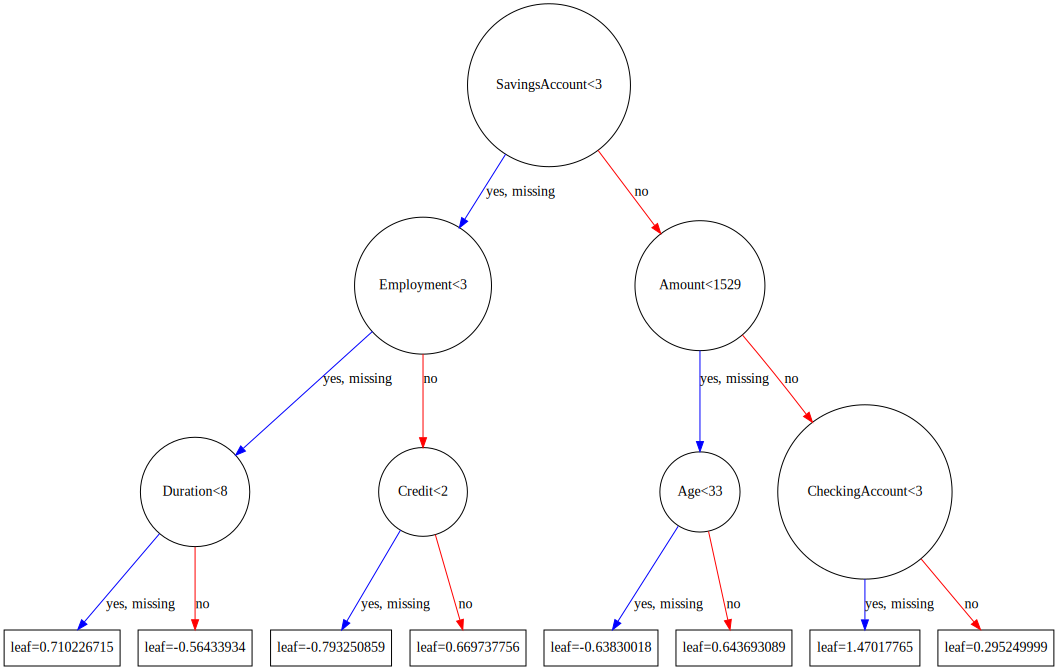

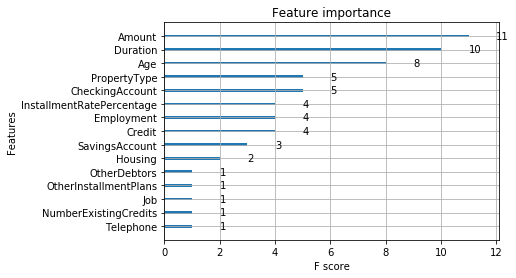

In [148]:
param = {'max_depth': 3, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
#param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)
xgb.plot_importance(bst)
xgb.to_graphviz(bst, num_trees=2)

In [150]:
from catboost import CatBoostClassifier
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
# Fit model
model.fit(X_train, y_train, X.columns)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.5450184	total: 4.49ms	remaining: 4.49ms
1:	learn: 0.5340977	total: 8.61ms	remaining: 0us


In [151]:
print(accuracy_score(model.predict(X_test), y_test))

0.71


In [162]:
model = CatBoostClassifier(iterations=10,
                           learning_rate=0.1,
                           depth=3)
# Fit model
model.fit(X_train, y_train, X.columns)
print(accuracy_score(model.predict(X_test), y_test))

0:	learn: 0.6612177	total: 7.1ms	remaining: 63.9ms
1:	learn: 0.6352140	total: 12.8ms	remaining: 51.2ms
2:	learn: 0.6176084	total: 16.3ms	remaining: 38ms
3:	learn: 0.6034898	total: 19.8ms	remaining: 29.7ms
4:	learn: 0.5916892	total: 23.4ms	remaining: 23.4ms
5:	learn: 0.5815219	total: 26.8ms	remaining: 17.8ms
6:	learn: 0.5736148	total: 30.4ms	remaining: 13ms
7:	learn: 0.5628810	total: 34.1ms	remaining: 8.54ms
8:	learn: 0.5553423	total: 37.8ms	remaining: 4.2ms
9:	learn: 0.5490173	total: 41.6ms	remaining: 0us
0.7171428571428572


In [168]:
from catboost import Pool
eval_dataset = Pool(X_test, y_test)
model = CatBoostClassifier(learning_rate=0.03, custom_metric=['Logloss', 'AUC:hints=skip_train~false'])
model.fit(X_train, y_train, eval_set=eval_dataset, verbose=False)
print(model.get_best_score())

{'learn': {'Logloss': 0.04181050577558015, 'AUC': 1.0}, 'validation': {'Logloss': 0.5141208392326657, 'AUC': 0.7649996091307067}}


In [169]:
print(accuracy_score(model.predict(X_test), y_test))

0.7514285714285714


In [172]:
from catboost import Pool, cv

cv_dataset = Pool(data=X_train, label=y_train, cat_features=X.columns)
params = {"iterations": 100, "depth": 3, "loss_function": "Logloss", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")
#It wasn't obvious to me how to use the CV scoring from the documentation.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [173]:
model.fit(X_train, y_train, use_best_model=True, eval_set=eval_dataset)
print("Count of trees in model = {}".format(model.tree_count_))
print(accuracy_score(model.predict(X_test), y_test))

0:	learn: 0.6785386	test: 0.6813992	best: 0.6813992 (0)	total: 15ms	remaining: 14.9s
1:	learn: 0.6662676	test: 0.6713064	best: 0.6713064 (1)	total: 26ms	remaining: 13s
2:	learn: 0.6524520	test: 0.6620314	best: 0.6620314 (2)	total: 37.2ms	remaining: 12.4s
3:	learn: 0.6440954	test: 0.6565084	best: 0.6565084 (3)	total: 49.6ms	remaining: 12.3s
4:	learn: 0.6337631	test: 0.6485714	best: 0.6485714 (4)	total: 60.3ms	remaining: 12s
5:	learn: 0.6264101	test: 0.6431839	best: 0.6431839 (5)	total: 71.9ms	remaining: 11.9s
6:	learn: 0.6161275	test: 0.6359613	best: 0.6359613 (6)	total: 83.3ms	remaining: 11.8s
7:	learn: 0.6133645	test: 0.6330339	best: 0.6330339 (7)	total: 92.9ms	remaining: 11.5s
8:	learn: 0.6045520	test: 0.6279225	best: 0.6279225 (8)	total: 106ms	remaining: 11.6s
9:	learn: 0.5949659	test: 0.6220506	best: 0.6220506 (9)	total: 119ms	remaining: 11.8s
10:	learn: 0.5877321	test: 0.6180567	best: 0.6180567 (10)	total: 135ms	remaining: 12.1s
11:	learn: 0.5791248	test: 0.6119933	best: 0.6119933

103:	learn: 0.3177171	test: 0.5153479	best: 0.5148329 (99)	total: 1.43s	remaining: 12.4s
104:	learn: 0.3172469	test: 0.5156862	best: 0.5148329 (99)	total: 1.44s	remaining: 12.3s
105:	learn: 0.3152723	test: 0.5150963	best: 0.5148329 (99)	total: 1.46s	remaining: 12.3s
106:	learn: 0.3128548	test: 0.5152255	best: 0.5148329 (99)	total: 1.47s	remaining: 12.3s
107:	learn: 0.3115666	test: 0.5151535	best: 0.5148329 (99)	total: 1.48s	remaining: 12.2s
108:	learn: 0.3107735	test: 0.5152645	best: 0.5148329 (99)	total: 1.49s	remaining: 12.2s
109:	learn: 0.3104569	test: 0.5153745	best: 0.5148329 (99)	total: 1.5s	remaining: 12.2s
110:	learn: 0.3094417	test: 0.5152952	best: 0.5148329 (99)	total: 1.52s	remaining: 12.2s
111:	learn: 0.3081150	test: 0.5152898	best: 0.5148329 (99)	total: 1.53s	remaining: 12.2s
112:	learn: 0.3068302	test: 0.5149234	best: 0.5148329 (99)	total: 1.55s	remaining: 12.2s
113:	learn: 0.3049292	test: 0.5146516	best: 0.5146516 (113)	total: 1.56s	remaining: 12.1s
114:	learn: 0.3045272

202:	learn: 0.2277957	test: 0.5267210	best: 0.5141208 (121)	total: 2.86s	remaining: 11.2s
203:	learn: 0.2265162	test: 0.5266797	best: 0.5141208 (121)	total: 2.87s	remaining: 11.2s
204:	learn: 0.2259117	test: 0.5263680	best: 0.5141208 (121)	total: 2.89s	remaining: 11.2s
205:	learn: 0.2256548	test: 0.5265935	best: 0.5141208 (121)	total: 2.9s	remaining: 11.2s
206:	learn: 0.2254580	test: 0.5268743	best: 0.5141208 (121)	total: 2.91s	remaining: 11.2s
207:	learn: 0.2251728	test: 0.5269165	best: 0.5141208 (121)	total: 2.92s	remaining: 11.1s
208:	learn: 0.2246013	test: 0.5272847	best: 0.5141208 (121)	total: 2.94s	remaining: 11.1s
209:	learn: 0.2239729	test: 0.5275442	best: 0.5141208 (121)	total: 2.96s	remaining: 11.1s
210:	learn: 0.2231518	test: 0.5274747	best: 0.5141208 (121)	total: 2.97s	remaining: 11.1s
211:	learn: 0.2226551	test: 0.5273062	best: 0.5141208 (121)	total: 2.99s	remaining: 11.1s
212:	learn: 0.2215386	test: 0.5271887	best: 0.5141208 (121)	total: 3s	remaining: 11.1s
213:	learn: 0.

296:	learn: 0.1733199	test: 0.5418051	best: 0.5141208 (121)	total: 4.29s	remaining: 10.2s
297:	learn: 0.1723508	test: 0.5413714	best: 0.5141208 (121)	total: 4.31s	remaining: 10.1s
298:	learn: 0.1717121	test: 0.5417035	best: 0.5141208 (121)	total: 4.32s	remaining: 10.1s
299:	learn: 0.1715708	test: 0.5419547	best: 0.5141208 (121)	total: 4.33s	remaining: 10.1s
300:	learn: 0.1705018	test: 0.5420142	best: 0.5141208 (121)	total: 4.35s	remaining: 10.1s
301:	learn: 0.1701233	test: 0.5427766	best: 0.5141208 (121)	total: 4.37s	remaining: 10.1s
302:	learn: 0.1692097	test: 0.5428981	best: 0.5141208 (121)	total: 4.38s	remaining: 10.1s
303:	learn: 0.1685352	test: 0.5428783	best: 0.5141208 (121)	total: 4.4s	remaining: 10.1s
304:	learn: 0.1682508	test: 0.5435265	best: 0.5141208 (121)	total: 4.42s	remaining: 10.1s
305:	learn: 0.1671536	test: 0.5431201	best: 0.5141208 (121)	total: 4.43s	remaining: 10s
306:	learn: 0.1667934	test: 0.5427622	best: 0.5141208 (121)	total: 4.45s	remaining: 10s
307:	learn: 0.1

394:	learn: 0.1332669	test: 0.5572160	best: 0.5141208 (121)	total: 5.73s	remaining: 8.78s
395:	learn: 0.1324726	test: 0.5573834	best: 0.5141208 (121)	total: 5.74s	remaining: 8.76s
396:	learn: 0.1323936	test: 0.5574136	best: 0.5141208 (121)	total: 5.76s	remaining: 8.74s
397:	learn: 0.1320433	test: 0.5572444	best: 0.5141208 (121)	total: 5.77s	remaining: 8.72s
398:	learn: 0.1318027	test: 0.5571445	best: 0.5141208 (121)	total: 5.78s	remaining: 8.71s
399:	learn: 0.1316389	test: 0.5571572	best: 0.5141208 (121)	total: 5.8s	remaining: 8.7s
400:	learn: 0.1311328	test: 0.5571699	best: 0.5141208 (121)	total: 5.82s	remaining: 8.69s
401:	learn: 0.1303941	test: 0.5572883	best: 0.5141208 (121)	total: 5.83s	remaining: 8.67s
402:	learn: 0.1297821	test: 0.5572574	best: 0.5141208 (121)	total: 5.85s	remaining: 8.66s
403:	learn: 0.1297156	test: 0.5573425	best: 0.5141208 (121)	total: 5.86s	remaining: 8.65s
404:	learn: 0.1295896	test: 0.5572447	best: 0.5141208 (121)	total: 5.88s	remaining: 8.64s
405:	learn: 

488:	learn: 0.1075491	test: 0.5692789	best: 0.5141208 (121)	total: 7.14s	remaining: 7.46s
489:	learn: 0.1074215	test: 0.5693891	best: 0.5141208 (121)	total: 7.15s	remaining: 7.44s
490:	learn: 0.1071700	test: 0.5695947	best: 0.5141208 (121)	total: 7.16s	remaining: 7.42s
491:	learn: 0.1065461	test: 0.5705694	best: 0.5141208 (121)	total: 7.17s	remaining: 7.41s
492:	learn: 0.1059415	test: 0.5710048	best: 0.5141208 (121)	total: 7.19s	remaining: 7.39s
493:	learn: 0.1054632	test: 0.5716433	best: 0.5141208 (121)	total: 7.2s	remaining: 7.38s
494:	learn: 0.1053159	test: 0.5717642	best: 0.5141208 (121)	total: 7.21s	remaining: 7.36s
495:	learn: 0.1051751	test: 0.5718449	best: 0.5141208 (121)	total: 7.23s	remaining: 7.34s
496:	learn: 0.1051345	test: 0.5718918	best: 0.5141208 (121)	total: 7.24s	remaining: 7.33s
497:	learn: 0.1050327	test: 0.5719369	best: 0.5141208 (121)	total: 7.26s	remaining: 7.32s
498:	learn: 0.1042231	test: 0.5724572	best: 0.5141208 (121)	total: 7.28s	remaining: 7.3s
499:	learn: 

581:	learn: 0.0864619	test: 0.5857621	best: 0.5141208 (121)	total: 8.53s	remaining: 6.13s
582:	learn: 0.0863202	test: 0.5858610	best: 0.5141208 (121)	total: 8.54s	remaining: 6.11s
583:	learn: 0.0862915	test: 0.5858824	best: 0.5141208 (121)	total: 8.55s	remaining: 6.09s
584:	learn: 0.0861985	test: 0.5861756	best: 0.5141208 (121)	total: 8.57s	remaining: 6.08s
585:	learn: 0.0860902	test: 0.5864900	best: 0.5141208 (121)	total: 8.58s	remaining: 6.06s
586:	learn: 0.0857610	test: 0.5863386	best: 0.5141208 (121)	total: 8.6s	remaining: 6.05s
587:	learn: 0.0856153	test: 0.5865628	best: 0.5141208 (121)	total: 8.61s	remaining: 6.03s
588:	learn: 0.0854992	test: 0.5868276	best: 0.5141208 (121)	total: 8.63s	remaining: 6.02s
589:	learn: 0.0853462	test: 0.5870224	best: 0.5141208 (121)	total: 8.64s	remaining: 6.01s
590:	learn: 0.0851990	test: 0.5871174	best: 0.5141208 (121)	total: 8.66s	remaining: 5.99s
591:	learn: 0.0851582	test: 0.5872839	best: 0.5141208 (121)	total: 8.68s	remaining: 5.98s
592:	learn:

675:	learn: 0.0720607	test: 0.6004534	best: 0.5141208 (121)	total: 9.94s	remaining: 4.76s
676:	learn: 0.0719545	test: 0.6007563	best: 0.5141208 (121)	total: 9.95s	remaining: 4.75s
677:	learn: 0.0719305	test: 0.6007853	best: 0.5141208 (121)	total: 9.96s	remaining: 4.73s
678:	learn: 0.0718621	test: 0.6010479	best: 0.5141208 (121)	total: 9.98s	remaining: 4.72s
679:	learn: 0.0718291	test: 0.6012950	best: 0.5141208 (121)	total: 9.99s	remaining: 4.7s
680:	learn: 0.0717939	test: 0.6015029	best: 0.5141208 (121)	total: 10s	remaining: 4.69s
681:	learn: 0.0717133	test: 0.6014017	best: 0.5141208 (121)	total: 10s	remaining: 4.67s
682:	learn: 0.0716410	test: 0.6017431	best: 0.5141208 (121)	total: 10s	remaining: 4.66s
683:	learn: 0.0716323	test: 0.6017438	best: 0.5141208 (121)	total: 10.1s	remaining: 4.65s
684:	learn: 0.0712787	test: 0.6024602	best: 0.5141208 (121)	total: 10.1s	remaining: 4.63s
685:	learn: 0.0711305	test: 0.6029612	best: 0.5141208 (121)	total: 10.1s	remaining: 4.62s
686:	learn: 0.071

767:	learn: 0.0607030	test: 0.6184385	best: 0.5141208 (121)	total: 11.3s	remaining: 3.42s
768:	learn: 0.0606897	test: 0.6184742	best: 0.5141208 (121)	total: 11.4s	remaining: 3.41s
769:	learn: 0.0605807	test: 0.6182920	best: 0.5141208 (121)	total: 11.4s	remaining: 3.4s
770:	learn: 0.0604510	test: 0.6186000	best: 0.5141208 (121)	total: 11.4s	remaining: 3.38s
771:	learn: 0.0602828	test: 0.6187780	best: 0.5141208 (121)	total: 11.4s	remaining: 3.37s
772:	learn: 0.0600320	test: 0.6189229	best: 0.5141208 (121)	total: 11.4s	remaining: 3.35s
773:	learn: 0.0599845	test: 0.6190242	best: 0.5141208 (121)	total: 11.4s	remaining: 3.34s
774:	learn: 0.0599321	test: 0.6191364	best: 0.5141208 (121)	total: 11.4s	remaining: 3.32s
775:	learn: 0.0598629	test: 0.6190804	best: 0.5141208 (121)	total: 11.5s	remaining: 3.31s
776:	learn: 0.0597525	test: 0.6192158	best: 0.5141208 (121)	total: 11.5s	remaining: 3.29s
777:	learn: 0.0596720	test: 0.6193231	best: 0.5141208 (121)	total: 11.5s	remaining: 3.28s
778:	learn:

859:	learn: 0.0525207	test: 0.6298269	best: 0.5141208 (121)	total: 12.7s	remaining: 2.07s
860:	learn: 0.0524636	test: 0.6299909	best: 0.5141208 (121)	total: 12.8s	remaining: 2.06s
861:	learn: 0.0524532	test: 0.6300787	best: 0.5141208 (121)	total: 12.8s	remaining: 2.04s
862:	learn: 0.0524458	test: 0.6301146	best: 0.5141208 (121)	total: 12.8s	remaining: 2.03s
863:	learn: 0.0522677	test: 0.6304906	best: 0.5141208 (121)	total: 12.8s	remaining: 2.01s
864:	learn: 0.0521006	test: 0.6306761	best: 0.5141208 (121)	total: 12.8s	remaining: 2s
865:	learn: 0.0520787	test: 0.6306415	best: 0.5141208 (121)	total: 12.8s	remaining: 1.98s
866:	learn: 0.0520439	test: 0.6305804	best: 0.5141208 (121)	total: 12.8s	remaining: 1.97s
867:	learn: 0.0520133	test: 0.6307160	best: 0.5141208 (121)	total: 12.8s	remaining: 1.95s
868:	learn: 0.0519630	test: 0.6306515	best: 0.5141208 (121)	total: 12.9s	remaining: 1.94s
869:	learn: 0.0519284	test: 0.6310598	best: 0.5141208 (121)	total: 12.9s	remaining: 1.92s
870:	learn: 0

960:	learn: 0.0446598	test: 0.6426542	best: 0.5141208 (121)	total: 14.3s	remaining: 582ms
961:	learn: 0.0446105	test: 0.6427553	best: 0.5141208 (121)	total: 14.4s	remaining: 567ms
962:	learn: 0.0445984	test: 0.6429146	best: 0.5141208 (121)	total: 14.4s	remaining: 552ms
963:	learn: 0.0445268	test: 0.6430271	best: 0.5141208 (121)	total: 14.4s	remaining: 538ms
964:	learn: 0.0445196	test: 0.6430519	best: 0.5141208 (121)	total: 14.4s	remaining: 523ms
965:	learn: 0.0444941	test: 0.6432913	best: 0.5141208 (121)	total: 14.4s	remaining: 508ms
966:	learn: 0.0443872	test: 0.6434863	best: 0.5141208 (121)	total: 14.4s	remaining: 493ms
967:	learn: 0.0441814	test: 0.6434064	best: 0.5141208 (121)	total: 14.5s	remaining: 478ms
968:	learn: 0.0441488	test: 0.6436088	best: 0.5141208 (121)	total: 14.5s	remaining: 463ms
969:	learn: 0.0441212	test: 0.6437938	best: 0.5141208 (121)	total: 14.5s	remaining: 448ms
970:	learn: 0.0439872	test: 0.6440024	best: 0.5141208 (121)	total: 14.5s	remaining: 433ms
971:	learn

In [174]:
import lightgbm as lgb

In [175]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, y_test)

In [179]:
param = {'num_leaves': 8, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data])

[1]	valid_0's auc: 0.680406
[2]	valid_0's auc: 0.681432
[3]	valid_0's auc: 0.689122
[4]	valid_0's auc: 0.698151
[5]	valid_0's auc: 0.697291
[6]	valid_0's auc: 0.70935
[7]	valid_0's auc: 0.715428
[8]	valid_0's auc: 0.71618
[9]	valid_0's auc: 0.720059
[10]	valid_0's auc: 0.721232
[11]	valid_0's auc: 0.725927
[12]	valid_0's auc: 0.72408
[13]	valid_0's auc: 0.7241
[14]	valid_0's auc: 0.723216
[15]	valid_0's auc: 0.723001
[16]	valid_0's auc: 0.727745
[17]	valid_0's auc: 0.730886
[18]	valid_0's auc: 0.731463
[19]	valid_0's auc: 0.730696
[20]	valid_0's auc: 0.734097
[21]	valid_0's auc: 0.735533
[22]	valid_0's auc: 0.736495
[23]	valid_0's auc: 0.73375
[24]	valid_0's auc: 0.733794
[25]	valid_0's auc: 0.736153
[26]	valid_0's auc: 0.740521
[27]	valid_0's auc: 0.740678
[28]	valid_0's auc: 0.741616
[29]	valid_0's auc: 0.742261
[30]	valid_0's auc: 0.742173
[31]	valid_0's auc: 0.743629
[32]	valid_0's auc: 0.743756
[33]	valid_0's auc: 0.744059
[34]	valid_0's auc: 0.743981
[35]	valid_0's auc: 0.744244


In [ ]:
#since this is the optional section, I'm not going to worry about the plot.
#but what I think is really bothering me here is that it didn't seem to matter which algorithm I used, they all got 
#an accuarcy score of about 75%. Did I do something wrong here?